# t-SNE T-distributed Stochastic Neighbor Embedding.  

t-SNE est un outil pour visualiser des données de grande dimension.  
Il convertit les similitudes entre les points de données en probabilités conjointes et tente de minimiser la divergence de Kullback-Leibler entre les probabilités conjointes de l'intégration de faible dimension et les données de grande dimension. 
t-SNE a une fonction de coût qui n'est pas convexe, c'est-à-dire qu'avec différentes initialisations, nous pouvons obtenir des résultats différents.  

Il est fortement recommandé d'utiliser une autre méthode de réduction de la dimensionnalité (par exemple PCA pour les données denses ou TruncatedSVD pour les données clairsemées) pour réduire le nombre de dimensions à un montant raisonnable (par exemple 50) si le nombre d'entités est très élevé.  
Cela supprimera un peu de bruit et accélérera le calcul des distances par paires entre les échantillons.

## Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

## Chargement des données

In [56]:
df_salary = pd.read_csv('/home/jupyter/saradsm2/data/salary.csv')
df_salary

,Unnamed: 0,District,Salary,Age,English,Education,Gender
0,0,Brooklyn,120000.0,31,Only language,Academic degree,Male
1,1,Brooklyn,45000.0,28,Only language,Academic degree,Female
2,2,Manhatten,85000.0,54,Only language,Academic degree,Male
3,3,Manhatten,12000.0,45,Only language,High school diploma,Female
4,4,Brooklyn,0.0,75,Very well,Academic degree,Female
...,...,...,...,...,...,...,...
59432,59432,Brooklyn,0.0,35,Very well,No diploma,Female
59433,59433,Queens,0.0,89,Only language,No diploma,Female
59434,59434,Bronx,0.0,34,Only language,No diploma,Male
59435,59435,Manhatten,0.0,61,Only language,No diploma,Female


## Dataprep
### Suppression des données inutiles

In [57]:
df_salary = df_salary.drop(columns=['Unnamed: 0'])
df_salary

,District,Salary,Age,English,Education,Gender
0,Brooklyn,120000.0,31,Only language,Academic degree,Male
1,Brooklyn,45000.0,28,Only language,Academic degree,Female
2,Manhatten,85000.0,54,Only language,Academic degree,Male
3,Manhatten,12000.0,45,Only language,High school diploma,Female
4,Brooklyn,0.0,75,Very well,Academic degree,Female
...,...,...,...,...,...,...
59432,Brooklyn,0.0,35,Very well,No diploma,Female
59433,Queens,0.0,89,Only language,No diploma,Female
59434,Bronx,0.0,34,Only language,No diploma,Male
59435,Manhatten,0.0,61,Only language,No diploma,Female


### Labellisation des variables catégorielles non numériques

In [58]:
le = preprocessing.LabelEncoder()
for column in ['District', 'English', 'Education', 'Gender']:
    df_salary[column] = le.fit_transform(
        df_salary[column].astype('str'))
df_salary

,District,Salary,Age,English,Education,Gender
0,1,120000.0,31,2,0,1
1,1,45000.0,28,2,0,0
2,2,85000.0,54,2,0,1
3,2,12000.0,45,2,1,0
4,1,0.0,75,3,0,0
...,...,...,...,...,...,...
59432,1,0.0,35,3,2,0
59433,3,0.0,89,2,2,0
59434,0,0.0,34,2,2,1
59435,2,0.0,61,2,2,0


### Traitement des valeurs nulles

In [59]:
df_salary['Salary'].fillna(0, inplace=True)


### Transformation des variables continues en catégorielles
#### Salary

<AxesSubplot:xlabel='Salary', ylabel='Count'>

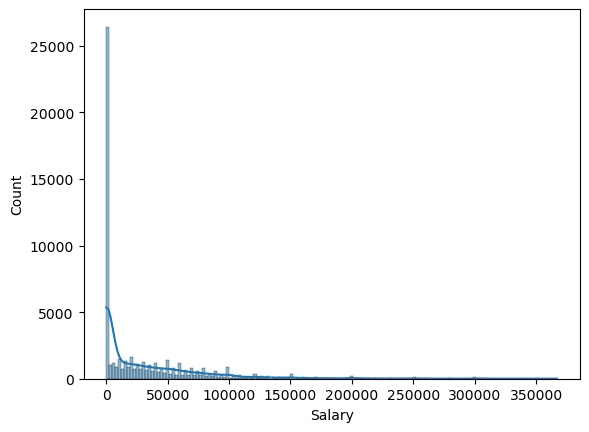

In [60]:
sns.histplot(df_salary['Salary'], kde=True)

<AxesSubplot:xlabel='Salary'>

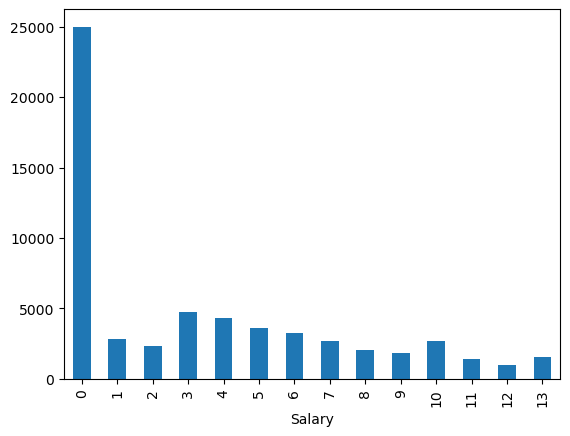

In [62]:
df_salary['Salary'] = pd.cut(df_salary['Salary'], bins=[-1,0,5000,10000,20000,30000,40000,50000,60000,70000,80000,100000,125000,150000,10000000], labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])
df_salary.groupby('Salary').Salary.count().sort_index().plot(kind='bar')

<AxesSubplot:xlabel='Age', ylabel='Count'>

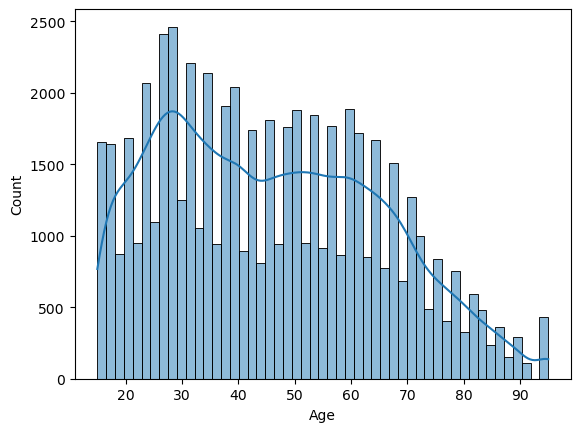

In [64]:
sns.histplot(df_salary['Age'], kde=True)

<AxesSubplot:xlabel='Age'>

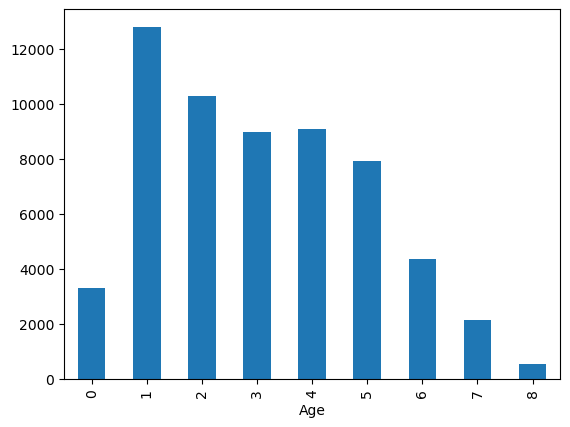

In [66]:
df_salary['Age'] = pd.cut(df_salary['Age'], bins=[0,18,30,40,50,60,70,80,90,100], labels=[0,1,2,3,4,5,6,7,8])
df_salary.groupby('Age').Age.count().sort_index().plot(kind='bar')

### Changement de types

In [67]:
df_salary.dtypes

District        int64
Salary       category
Age          category
English         int64
Education       int64
Gender          int64
Age_cat      category
dtype: object

In [68]:
df_salary_columns = set(df_salary.columns)
for c in df_salary_columns:
    df_salary[c] = df_salary[c].astype('category')

In [69]:
df_salary.dtypes

District     category
Salary       category
Age          category
English      category
Education    category
Gender       category
Age_cat      category
dtype: object

## Calcul du t-SNE

In [70]:
 X_embedded = TSNE(n_components=2, learning_rate=20, n_iter=250, perplexity=64, n_jobs=-1).fit_transform(df_salary[0:1000])

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


### Sauvegarder le résultat

In [71]:
np.savetxt("tsne_salary.csv", X_embedded, delimiter=",")

### Charger un résultat précédent

In [72]:
#X_embedded_loaded = np.loadtxt(open('tsne_salary.csv',"rb"), delimiter=",", skiprows=0)

### Visualisation du résultat

In [81]:
len(pd.Index(df_salary.District.value_counts()))

5

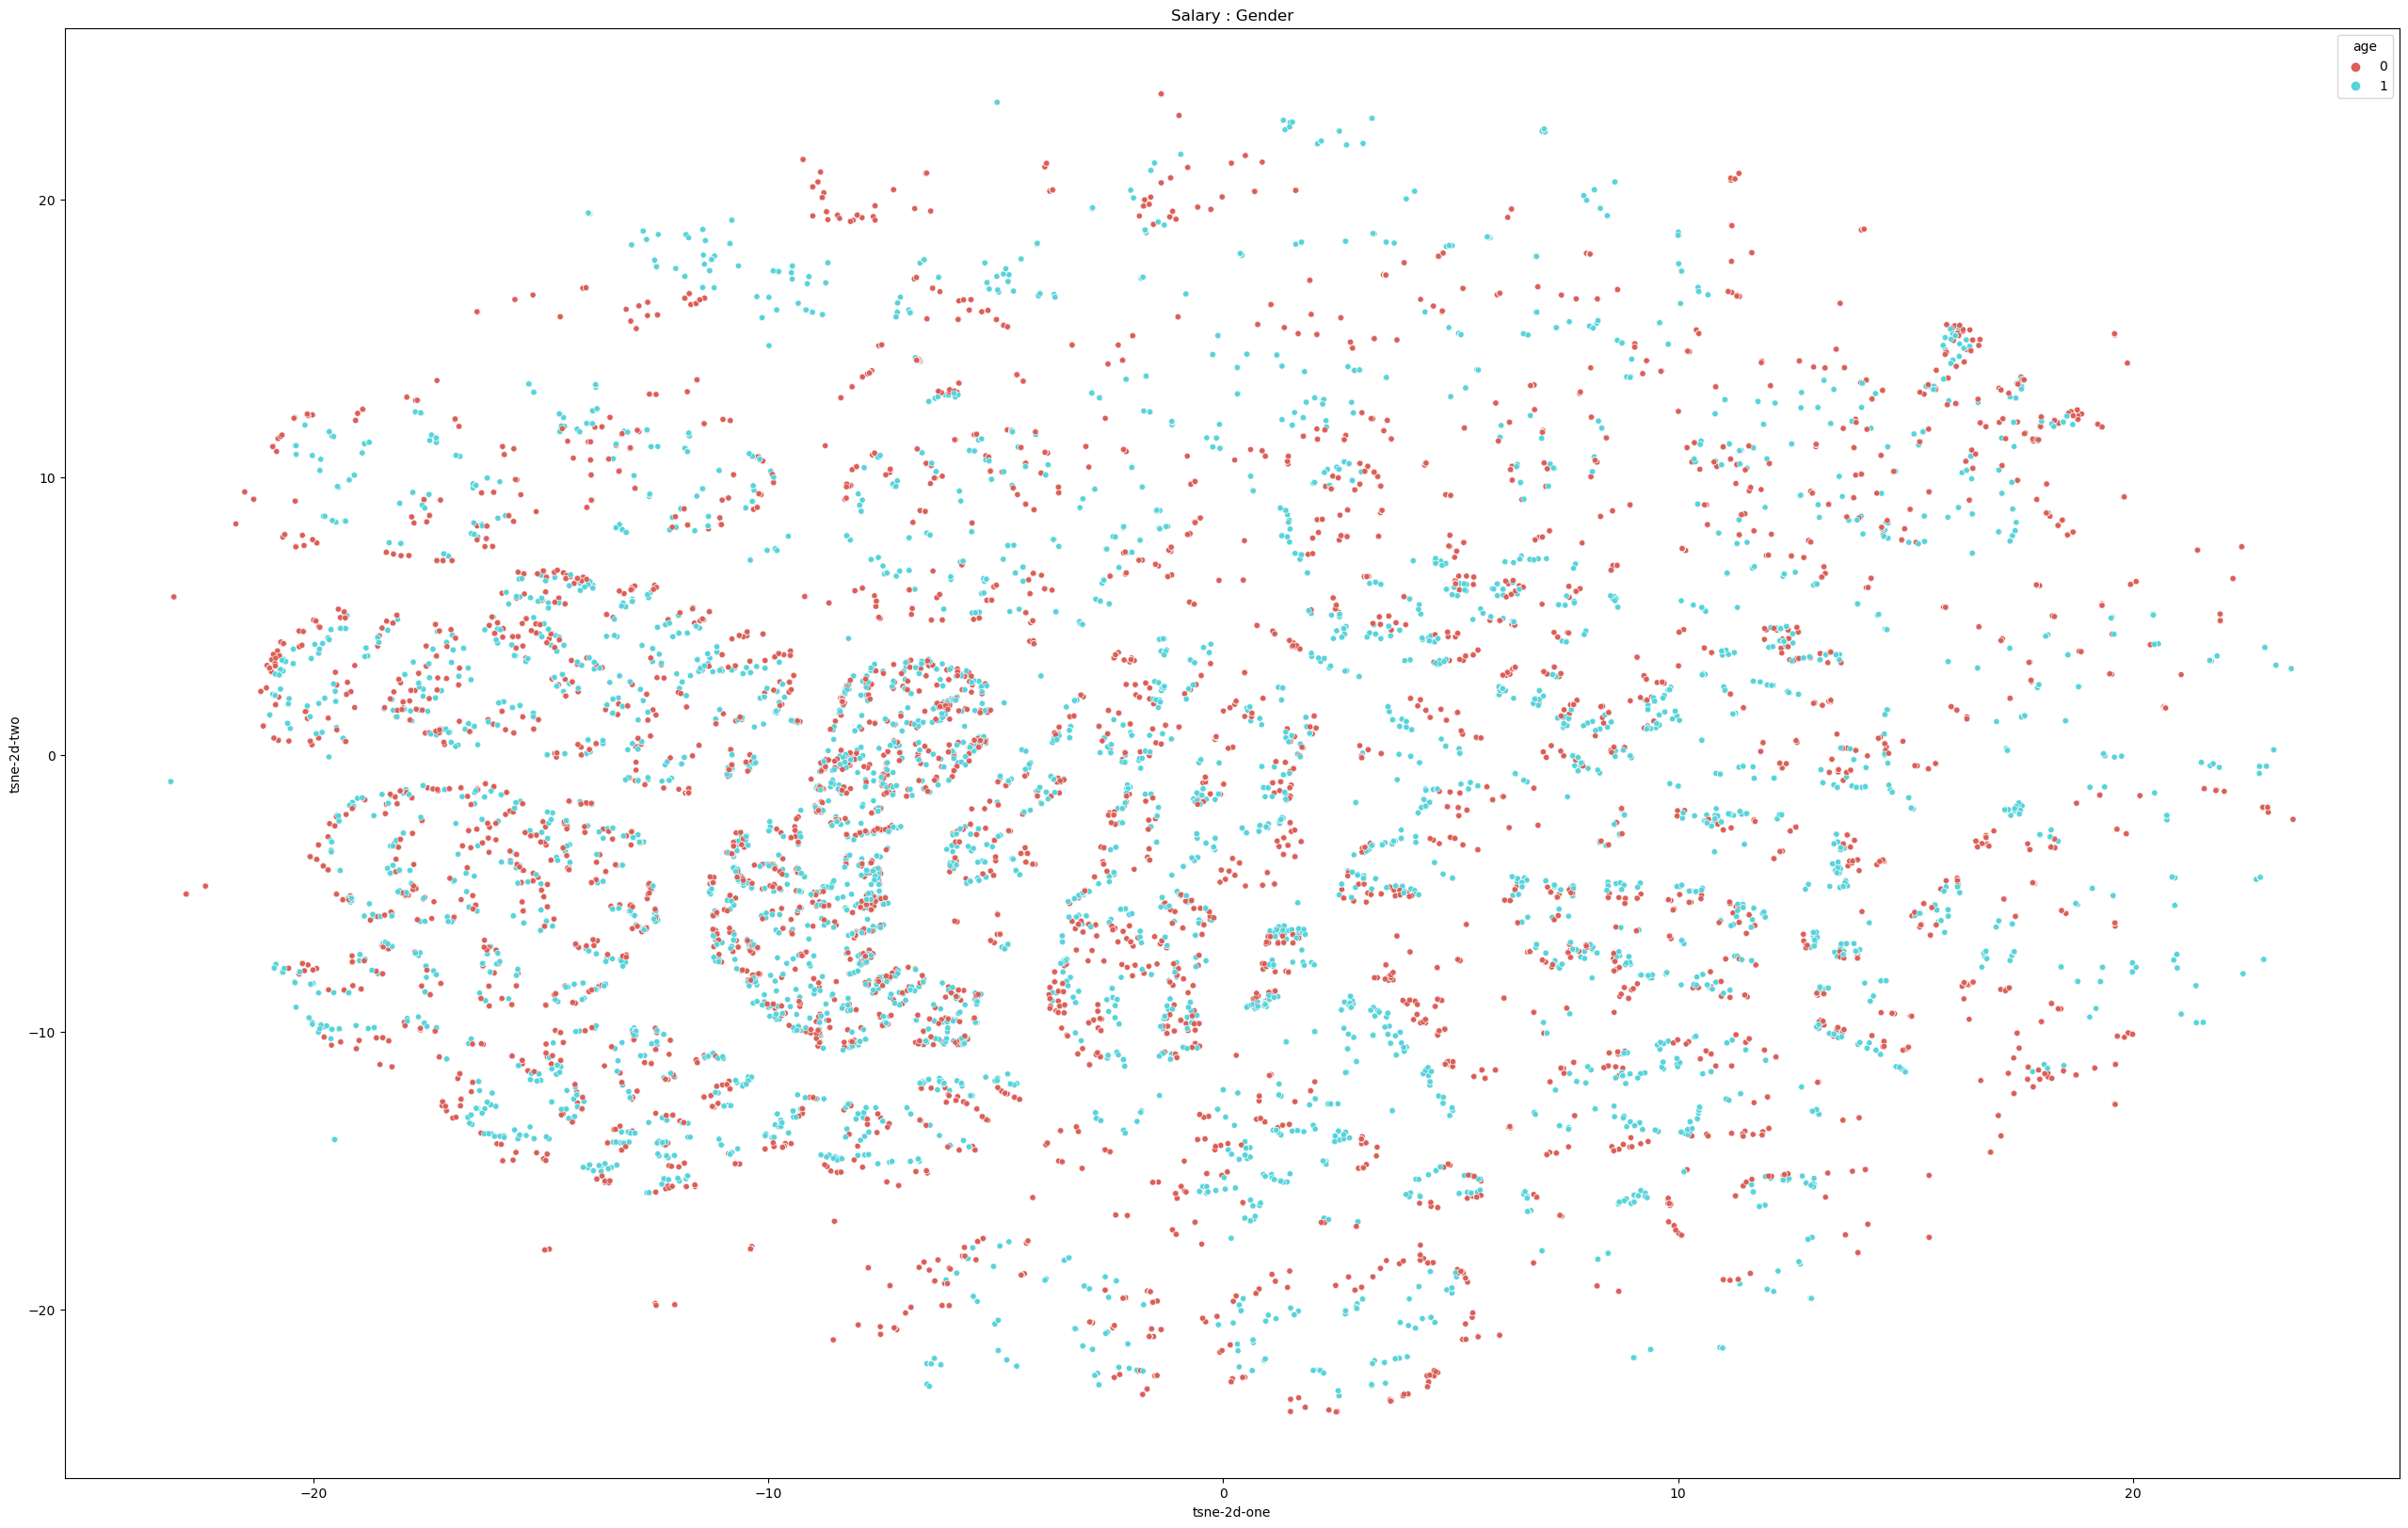

In [84]:
f=pd.DataFrame()
f['tsne-2d-one'] = X_embedded[:,0]
f['tsne-2d-two'] = X_embedded[:,1]
f['age'] = df_salary.Gender
plt.figure(figsize=(32,20))
s = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="age",
    palette=sns.color_palette("hls", n_colors=len(pd.Index(df_salary.Gender.value_counts()))),
    data=f,
    s=20,
    legend="full",
    alpha=1,
    edgecolors='none',
)
s.set_title("Salary : Gender")
plt.savefig("tsne-salary-gender.png")